In [1]:
import random 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# coin toss
random.choice(['H', 'T'])

'H'

In [3]:
# die roll
random.choice([1, 2, 3, 4, 5, 6]) 

3

In [4]:
# bus is late anywhere from 0 to 10 minutes, uniform distribution
random.uniform(0, 10) 

# how is this different from random.choice([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])?

9.320574324664989

# Sampling from probability distribution

What happens when you change the number of experiments (i.e. coin flip, die roll, bus arrival time measurement) from 20 to 100? 1000? 5?

<Axes: ylabel='Density'>

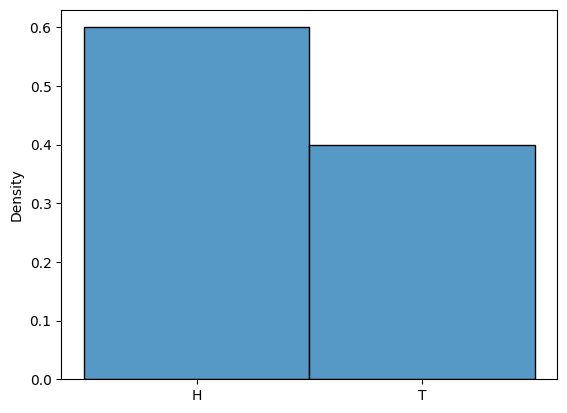

In [20]:
flips = random.choices(['H', 'T'], k=20)
sns.histplot(flips, stat='density') # This is empirical distribution of simulated data

<Axes: ylabel='Density'>

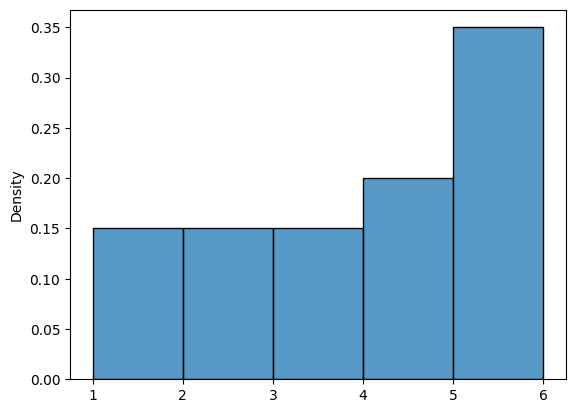

In [8]:
rolls = random.choices([1, 2, 3, 4, 5, 6], k=20)
sns.histplot(rolls, stat='density', bins=range(1,7))

# Law of large numbers

Sample mean approaches population mean

In [13]:
# expected value is 1/2 (

flips = random.choices([1, 0], k=20)
sum(flips)/len(flips) # calculate sample mean

0.4

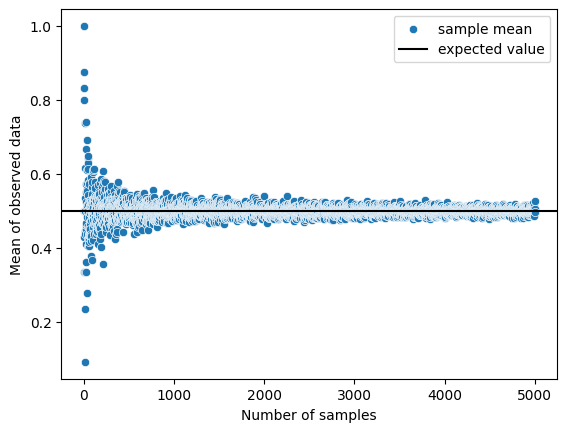

In [16]:
ks = range(1, 5001) 
# Number of samples drawn from uniform distribution, try 1 to 1000

all_means = []

for k in ks:
    flips = random.choices([1, 0], k=k)
    m = sum(flips)/len(flips) # calculate sample mean
    all_means.append(m) # save sample mean

fig, ax = plt.subplots(1)
sns.scatterplot(x=ks, y=all_means, label='sample mean')
ax.set_xlabel('Number of samples')
ax.set_ylabel('Mean of observed data')
ax.axhline(0.5, color='k', label='expected value')
ax.legend()

In [9]:
# expected value is 3.5

rolls = random.choices([1, 2, 3, 4, 5, 6], k=20)
sum(rolls)/len(rolls) # calculate sample mean

3.65

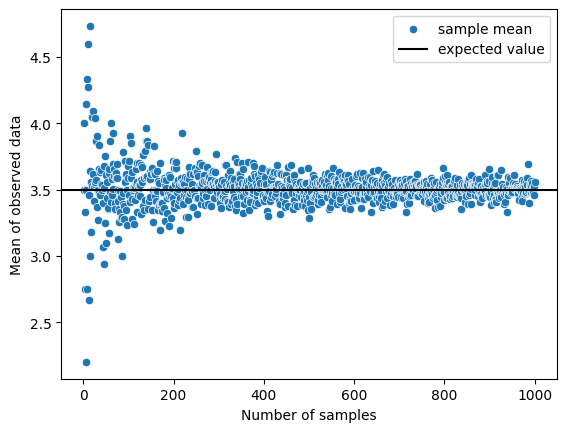

In [11]:
ks = range(1, 5001) 
# Number of samples drawn from uniform distribution, try 1 to 1000

all_means = []

for k in ks:
    rolls = random.choices([1, 2, 3, 4, 5, 6], k=k)
    m = sum(rolls)/len(rolls) # calculate sample mean
    all_means.append(m) # save sample mean

fig, ax = plt.subplots(1)
sns.scatterplot(x=ks, y=all_means, label='sample mean')
ax.set_xlabel('Number of samples')
ax.set_ylabel('Mean of observed data')
ax.axhline(3.5, color='k', label='expected value')
ax.legend()

# Central Limit Theorem

Distribution of sample means approaches normal distribution.

Try the different values for `num_rolls_per_expt` and `num_buses_per_expt`. Do you notice anything change in the mean and std of sample means? In the shape?

num_experiment: 1000
num_rolls_per_expt: 80
mean of sample means: 3.494125
standard deviation of sample means: 0.1952030060951639


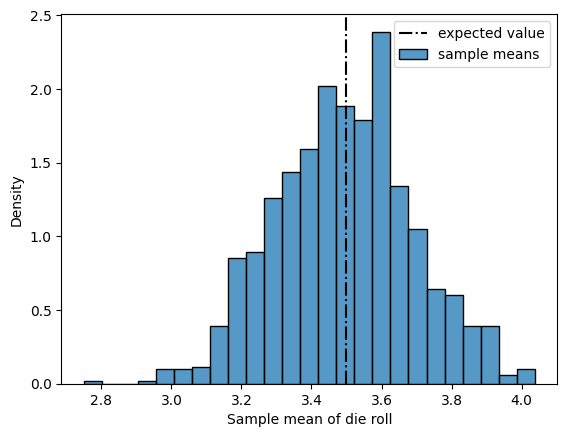

In [27]:
num_experiment = 1000 # number of times you repeat the experiment

num_rolls_per_expt = 80 # number of samples you draw from uniform distribution
#num_rolls_per_expt = 20
#num_rolls_per_expt = 80
#num_rolls_per_expt = 320

all_means = []


for roll in range(num_experiment): 
    rolls = random.choices([1, 2, 3, 4, 5, 6], k=num_rolls_per_expt) 
    m = sum(rolls)/len(rolls) # calulate sample mean
    all_means.append(m)

fig, ax = plt.subplots(1)
sns.histplot(all_means, label='sample means', stat='density')
ax.set_xlabel('Sample mean of die roll')
ax.axvline(3.5, label='expected value', color='k', linestyle='-.')
ax.legend()

print('num_experiment:', num_experiment)
print('num_rolls_per_expt:', num_rolls_per_expt)
print('mean of sample means:', pd.DataFrame(all_means).mean()[0])
print('standard deviation of sample means:', pd.DataFrame(all_means).std()[0])

num_experiment: 1000
num_flips_per_expt: 30
mean of sample means: 0.4972
standard deviation of sample means: 0.09260827094489432


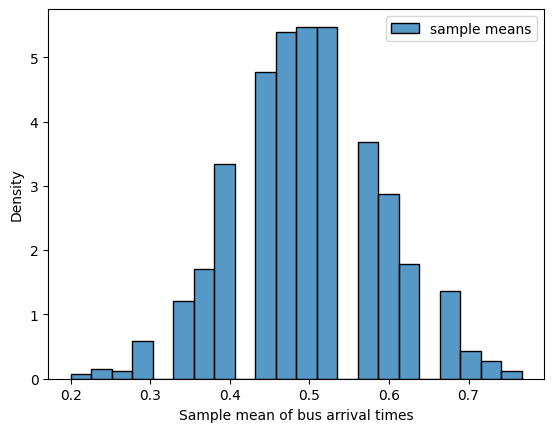

In [35]:
num_experiment = 1000  # number of times you repeat the experiment

num_flips_per_expt = 30 # number of samples you draw from uniform distribution
#num_buses_per_expt = 20
#num_buses_per_expt = 80
#num_buses_per_expt = 320

all_means = []

for measurement in range(num_experiment):
    flip = random.choices([1, 0], k=num_flips_per_expt) 
    m = sum(flip)/len(flip) # calulate sample mean
    all_means.append(m)

fig, ax = plt.subplots(1)
sns.histplot(all_means, label='sample means', stat='density')
ax.set_xlabel('Sample mean of bus arrival times')
ax.legend()

print('num_experiment:', num_experiment)
print('num_flips_per_expt:', num_flips_per_expt)
print('mean of sample means:', pd.DataFrame(all_means).mean()[0])
print('standard deviation of sample means:', pd.DataFrame(all_means).std()[0])